# 情感分类(多项式朴素贝叶斯)

In [1]:
import pandas as pd

df = pd.read_excel("data/长白山1.xlsx")
df

,Unnamed: 0,commentId,review,score,province
0,0,180346550,好玩 爱玩 下回还玩 喜欢来 带着室友趁着假期来的 充分的让我们得心情得到了放松 下回我还想...,5,吉林
1,1,180346544,好玩 爱玩 下回还去。虽然来过两次了但我还想来 真的很有意思 和室友一起去 我很开心很自豪 ...,5,吉林
2,2,180346543,好玩 爱去 下回还来 非常喜欢 这150积分好难挣 再凑点字数求你了多给点分吧 求求你求求你...,5,吉林
3,3,180293661,携程上购买的套票不包括天池主峰门票，也没有提醒需要额外购买，体验不太好，对于第一次来的朋友不...,5,上海
4,4,180292292,来长白山如果是时间有限只能游览一天的话\n建议直接选北景区\n\n说实在长白山的风景其实很多...,5,湖南
...,...,...,...,...,...
2455,2455,59614525,很好，感觉也不错，气质内涵，触动心铉，让人心旷神怡,5,NaN
2456,2456,115500845,帮妈妈和阿姨预约的路程，她们都赞不绝口。行程安排不错，导游服务很好，不会强迫买东西！景点风景...,5,NaN
2457,2457,115498637,我们是全家出游、总体来说很愉快。景区服务一般。等候进门的游客太多太多了、还不是旅游旺季,4,NaN
2458,2458,115497529,为了盗墓笔记才去的，要说它本来没什么好看的。。。不过大天池挺不错的，云雾缭绕中看到了中朝边界哈哈,5,NaN


In [9]:
df.groupby("province").count().sort_values('score',ascending=False)

,Unnamed: 0,commentId,review,score
province,,,,
吉林,238,238,238,238
辽宁,73,73,73,73
北京,65,65,65,65
黑龙江,47,47,47,47
山东,40,40,40,40
河北,36,36,36,36
广东,29,29,29,29
上海,28,28,28,28
江苏,27,27,27,27


In [12]:
df.groupby("province").get_group("吉林").groupby('score').count()

,Unnamed: 0,commentId,review,province
score,,,,
1,32,32,32,32
2,8,8,8,8
3,16,16,16,16
4,29,29,29,29
5,153,153,153,153


In [14]:
jilin = df.groupby("province").get_group("吉林").groupby('score').count()

Text(0, 0.5, '数量')

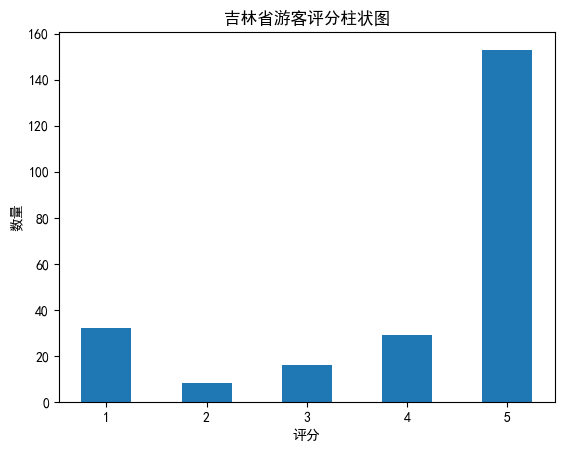

In [25]:
import matplotlib.pyplot as plt

plt.bar(jilin.index,jilin['province'], width=0.5)
plt.title("吉林省游客评分柱状图")
plt.xlabel("评分")
plt.ylabel("数量")

,Unnamed: 0,commentId,review,province
score,,,,
1,9,9,9,9
2,2,2,2,2
3,4,4,4,4
4,4,4,4,4
5,54,54,54,54


Text(0, 0.5, '数量')

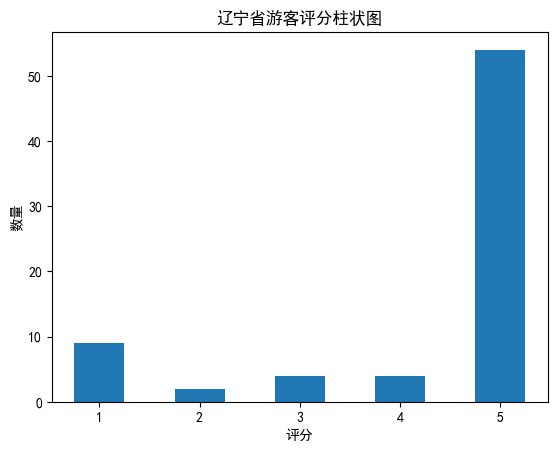

In [26]:
liaoning = df.groupby("province").get_group("辽宁").groupby('score').count()
liaoning

import matplotlib.pyplot as plt

plt.bar(liaoning.index,liaoning['province'], width=0.5)
plt.title("辽宁省游客评分柱状图")
plt.xlabel("评分")
plt.ylabel("数量")

Text(0, 0.5, '数量')

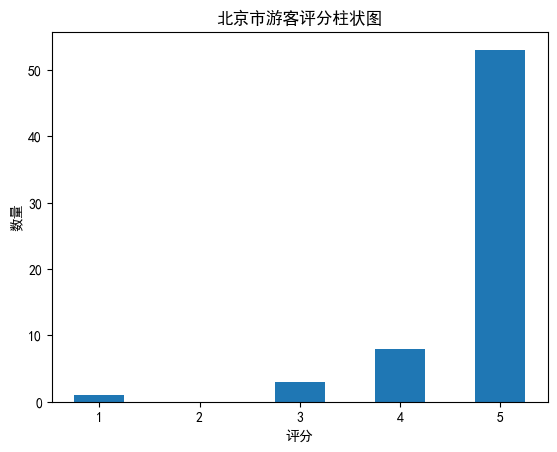

In [27]:
beijing = df.groupby("province").get_group("北京").groupby('score').count()
beijing

import matplotlib.pyplot as plt

plt.bar(beijing.index,beijing['province'], width=0.5)
plt.title("北京市游客评分柱状图")
plt.xlabel("评分")
plt.ylabel("数量")

In [7]:
df['review'].str.cat(sep=".")

'好玩 爱玩 下回还玩 喜欢来 带着室友趁着假期来的 充分的让我们得心情得到了放松 下回我还想来 我很自豪领他们来到了一个非常好的地方.好玩 爱玩 下回还去。虽然来过两次了但我还想来 真的很有意思 和室友一起去 我很开心很自豪 带他们来到了长白山 开心 在水几个字多拿积分.好玩 爱去 下回还来 非常喜欢 这150积分好难挣 再凑点字数求你了多给点分吧 求求你求求你求求你求求你求求你 给我吧 给我吧.携程上购买的套票不包括天池主峰门票，也没有提醒需要额外购买，体验不太好，对于第一次来的朋友不太友好，容易踩坑。提醒大家买票在长白山公众号里购买门票，交通票，天池票。.来长白山如果是时间有限只能游览一天的话\n建议直接选北景区\n\n说实在长白山的风景其实很多地方都比它美\n但是论到长白山天池就不能一概而论了\n到了长白山之后记得要多付80元的商务车上天池呀\n因为美景全在天池\n其次是建议可以吃一下长白山的温泉蛋\n虽然小贵 但是体验感不错\n人参奶就因人而异吧\n味道有点像人参洗发水呢\n\n建议地下森林没有雪就不要去了\n不但累 景色也很一般.来长白山如果是时间有限只能游览一天的话\n建议直接选北景区\n\n说实在长白山的风景其实很多地方都比它美\n但是论到长白山天池就不能一概而论了\n到了长白山之后记得要多付80元的商务车上天池呀\n因为美景全在天池\n其次是建议可以吃一下长白山的温泉蛋\n虽然小贵 但是体验感不错\n人参奶就因人而异吧\n味道有点像人参洗发水呢\n\n建议地下森林没有雪就不要去了\n不但累 景色也很一般.好看！看到了！.上山需要看天气，得及时关注。北景区除了天池，还有地下森林、绿渊潭、天池瀑布等，都是很好看的。上山一定要早，尤其是冬季四点就天黑了，不然看不完全。一年四季都是不同的景色，天池真的很美。.大美长白山，名不虚传.—………～～～～.挺好的👌…….等车时间太长，其它可以.还不错吧。.出票很快，马上就可以用了！不错的一次体验，希望下次还可以过来，这次行程太匆忙，闺蜜几人说走就走的旅程，哈哈！下次带孩子再过来一次！.出票很快，马上就可以用了！不错的一次体验，希望下次还可以过来，这次行程太匆忙，闺蜜几人说走就走的旅程，哈哈！下次带孩子再过来一次！.当天天池没开，所幸景区开了，入景区门口后还要坐18公里的景交到达核心区，个人觉得防寒装备只租护脚套就够

In [3]:
df.drop(df[df["score"]==3].index, inplace=True)

In [4]:
df

,score,review
0,5,长白山天池，我此生无憾。来到这里，了却了自己的一个心愿，除了对天池的向往，我来看我在这里修行...
1,5,长白山天池，我觉得此生可以必游的景点之一，也是东北旅游最好的景点，没有之一。东北最好的景点可...
2,5,多亏用携程提前定了票，丝滑入园，没有排队。运气很好，看见了天池，真的超级幸运。如果没有买票的...
3,5,非常满意，直接刷身份证就可以。2号到的长白山，3号最早的票幸运的看到了天池。去天池还要单独购...
4,5,当天天池没开，所幸景区开了，入景区门口后还要坐18公里的景交到达核心区，个人觉得防寒装备只租...
...,...,...
2445,1,在这里门票。呵呵。毫无意义。一点不便宜。强烈不推荐
2446,1,上不了天池，不开山也不提前跟我们通知，体验感很差
2447,1,门票价格贵，还不包含到天池的车票，很不方便
2448,1,排队人太多，根本没上去，白白花了三百块


In [5]:
def tagging(x):
    if x > 3:
        return 1
    elif x < 3:
        return 0

In [6]:
df['label'] = df['score'].apply(tagging)
df

,score,review,label
0,5,长白山天池，我此生无憾。来到这里，了却了自己的一个心愿，除了对天池的向往，我来看我在这里修行...,1
1,5,长白山天池，我觉得此生可以必游的景点之一，也是东北旅游最好的景点，没有之一。东北最好的景点可...,1
2,5,多亏用携程提前定了票，丝滑入园，没有排队。运气很好，看见了天池，真的超级幸运。如果没有买票的...,1
3,5,非常满意，直接刷身份证就可以。2号到的长白山，3号最早的票幸运的看到了天池。去天池还要单独购...,1
4,5,当天天池没开，所幸景区开了，入景区门口后还要坐18公里的景交到达核心区，个人觉得防寒装备只租...,1
...,...,...,...
2445,1,在这里门票。呵呵。毫无意义。一点不便宜。强烈不推荐,0
2446,1,上不了天池，不开山也不提前跟我们通知，体验感很差,0
2447,1,门票价格贵，还不包含到天池的车票，很不方便,0
2448,1,排队人太多，根本没上去，白白花了三百块,0


In [7]:
X = df['review']
Y = df['label']

In [8]:
from sklearn.model_selection import cross_validate,train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123) 
X_train.shape

(1635,)

In [9]:
X_train

234                                         长白山风景很美，值得一游。
180     长白山非常好玩，我们居然非常顺利的看到了天池，携程订票很方便，不用去官方抢，全程也都很通畅顺...
1696                                   方便。刷二维码进院。免去了排队等候哦
1910                              冬季夏季都有不一样的风景，非常值得去休闲的地方
924     登临西坡览全湖，北坡凡馆称博物，戏台溪瀑洗俗心，白河公园水趣足。\n西坡看湖和北坡不同，西坡...
                              ...                        
1188      很不错的一次旅行，客服很热心，就是捆绑摆渡车没有起到作用，因为住在景区里面，不需要乘坐摆渡车。
2226      本想买个网络票能快速通过！没想到网络通道就才一个口，还是人工扫码，那叫一个慢呀！还不如纸票快！
1831                         长白山夏天比冬天景色更吸引人，而且更容易看到天池的风貌。
1161                           非常值得去，冰天雪地、壮丽江山，勇闯天涯的非凡体验。
1399    比较方便，下单后短信息发来一个网址，到景区后通过链接提取二维码，直接刷二维码进入，不用排队购...
Name: review, Length: 1635, dtype: object

In [10]:
Y_test.shape

(702,)

In [11]:
# from jieba import cut  
import jieba
df['review'] = df['review'].astype(str).apply(lambda x: ' '.join(jieba.cut(x)))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\QINGYU~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.318 seconds.
Prefix dict has been built successfully.


In [12]:
df['review']

0       长白山天池 ， 我 此生 无憾 。 来到 这里 ， 了 却 了 自己 的 一个 心愿 ， 除...
1       长白山天池 ， 我 觉得 此生 可以 必游 的 景点 之一 ， 也 是 东北 旅游 最好 的...
2       多亏 用 携程 提前 定 了 票 ， 丝 滑入 园 ， 没有 排队 。 运气 很 好 ， 看...
3       非常 满意 ， 直接 刷 身份证 就 可以 。 2 号 到 的 长白山 ， 3 号 最早 的...
4       当天 天池 没 开 ， 所幸 景区 开 了 ， 入 景区 门口 后 还要 坐 18 公里 的...
                              ...                        
2445              在 这里 门票 。 呵呵 。 毫无意义 。 一点 不 便宜 。 强烈 不 推荐
2446             上 不了 天池 ， 不 开山 也 不 提前 跟 我们 通知 ， 体验 感 很 差
2447                   门票价格 贵 ， 还 不 包含 到 天池 的 车票 ， 很 不 方便
2448                         排队 人太多 ， 根本 没上去 ， 白白 花 了 三百块
2449                       时间 错 了 ， 就 没法 退 了 ， 晕死 ， 霸王 条款
Name: review, Length: 2337, dtype: object

In [13]:
df

,score,review,label
0,5,长白山天池 ， 我 此生 无憾 。 来到 这里 ， 了 却 了 自己 的 一个 心愿 ， 除...,1
1,5,长白山天池 ， 我 觉得 此生 可以 必游 的 景点 之一 ， 也 是 东北 旅游 最好 的...,1
2,5,多亏 用 携程 提前 定 了 票 ， 丝 滑入 园 ， 没有 排队 。 运气 很 好 ， 看...,1
3,5,非常 满意 ， 直接 刷 身份证 就 可以 。 2 号 到 的 长白山 ， 3 号 最早 的...,1
4,5,当天 天池 没 开 ， 所幸 景区 开 了 ， 入 景区 门口 后 还要 坐 18 公里 的...,1
...,...,...,...
2445,1,在 这里 门票 。 呵呵 。 毫无意义 。 一点 不 便宜 。 强烈 不 推荐,0
2446,1,上 不了 天池 ， 不 开山 也 不 提前 跟 我们 通知 ， 体验 感 很 差,0
2447,1,门票价格 贵 ， 还 不 包含 到 天池 的 车票 ， 很 不 方便,0
2448,1,排队 人太多 ， 根本 没上去 ， 白白 花 了 三百块,0


In [14]:
import pandas as pd  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  
from sklearn.naive_bayes import MultinomialNB

训练数据文本向量化

In [15]:
vectorizer = CountVectorizer()  
x_train_vectorizer = vectorizer.fit_transform(X_train)
x_train_vectorizer

<1635x8074 sparse matrix of type '<class 'numpy.int64'>'
	with 9837 stored elements in Compressed Sparse Row format>

In [16]:
x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
x_test_vectorizer = vectorizer.transform(X_test)
x_test_vectorizer

<702x8074 sparse matrix of type '<class 'numpy.int64'>'
	with 1094 stored elements in Compressed Sparse Row format>

使用朴素贝叶斯分类器进行训练

In [18]:
clf = MultinomialNB()  
clf.fit(x_train_vectorizer, Y_train)

MultinomialNB()

使用模型进行预测：

In [19]:
predictions = clf.predict(x_test_vectorizer)

评估分类器的性能：

In [20]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(x_test_vectorizer)
accuracy = accuracy_score(Y_test, predictions)  
print("Accuracy:", accuracy)

Accuracy: 0.9444444444444444


In [21]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
result_df = X_test.to_frame()
result_df['label'] = predictions
result_df.sort_values(by=['label'],  inplace=True)
result_df.to_excel("data/review_sentiment.xlsx")